In [278]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## **Exercise: Preprocessing**

Dataset: 'adult.csv'

1. Data
1. EDA
1. Missing value & Outliers Exploration
1. Data Splitting
1. Preprocessing
    - Binning 
    - Impute missing values
    - Encoding
1. Model fitting and evaluation
1. Model properties

**Data**

An individual’s annual income results from various factors. 
Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>

Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
- The income is divide into two classes: <=50K & >50K
<br>
Number of attributes: 14
<br>
- These are the demographics and other 
<br>
features to describe a person

<br>
drop columns: 'fnlwgt', 'education'

We will explore the possibility in predicting income level based on the individual’s personal information.


In [249]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [250]:
df.drop(columns=['fnlwgt','education'], inplace= True)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education.num   32561 non-null  int64 
 3   marital.status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  native.country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [252]:
df.isna().sum()

age               0
workclass         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [253]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [254]:
df.replace('?',np.nan, inplace= True)

In [255]:
df.duplicated().sum()

3465

In [256]:
df.drop_duplicates(inplace= True)

In [257]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [258]:
# plt.figure(figsize=(20,10))
# plt.subplot(2,2,1)
# sns.boxplot(df, x='age')
# plt.subplot(2,2,2)
# sns.boxplot(df, x='education.num')
# plt.subplot(2,2,3)
# sns.boxplot(df, x='Landsize')
# plt.subplot(2,2,4)
# sns.boxplot(df, x='BuildingArea')
# plt.show()

In [259]:
df.select_dtypes(include=['int64', 'float64']).columns


Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

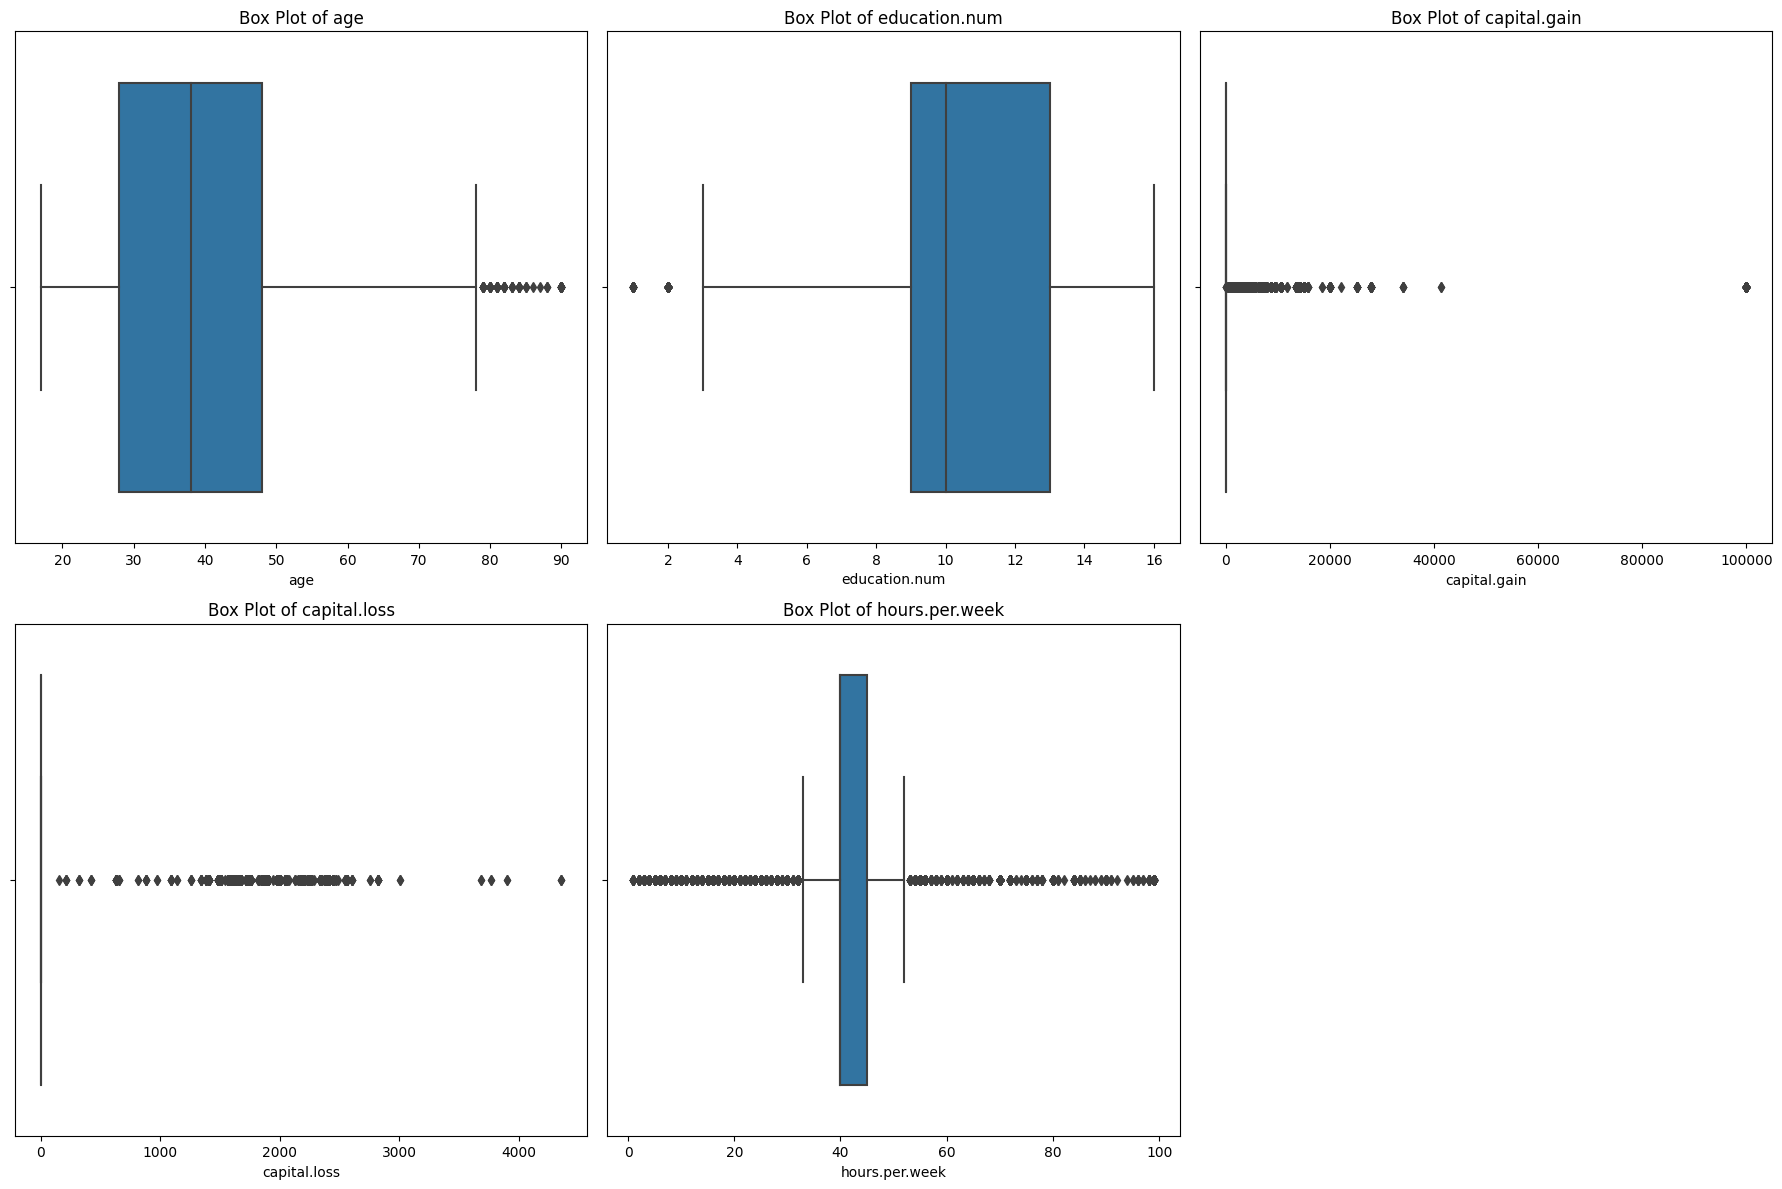

In [260]:
def numerical_boxplots(data):
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.ravel()  # Flatten the 2D array of axes

    for i, column in enumerate(numerical_columns):
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')
        # axes[i].set_ylabel(column)

    # Hide any empty subplots
    for i in range(num_plots, num_rows * 3):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame 'df'
numerical_boxplots(df)


In [261]:
df = df[~((df['capital.gain']>40000) | (df['education.num']<=2))]

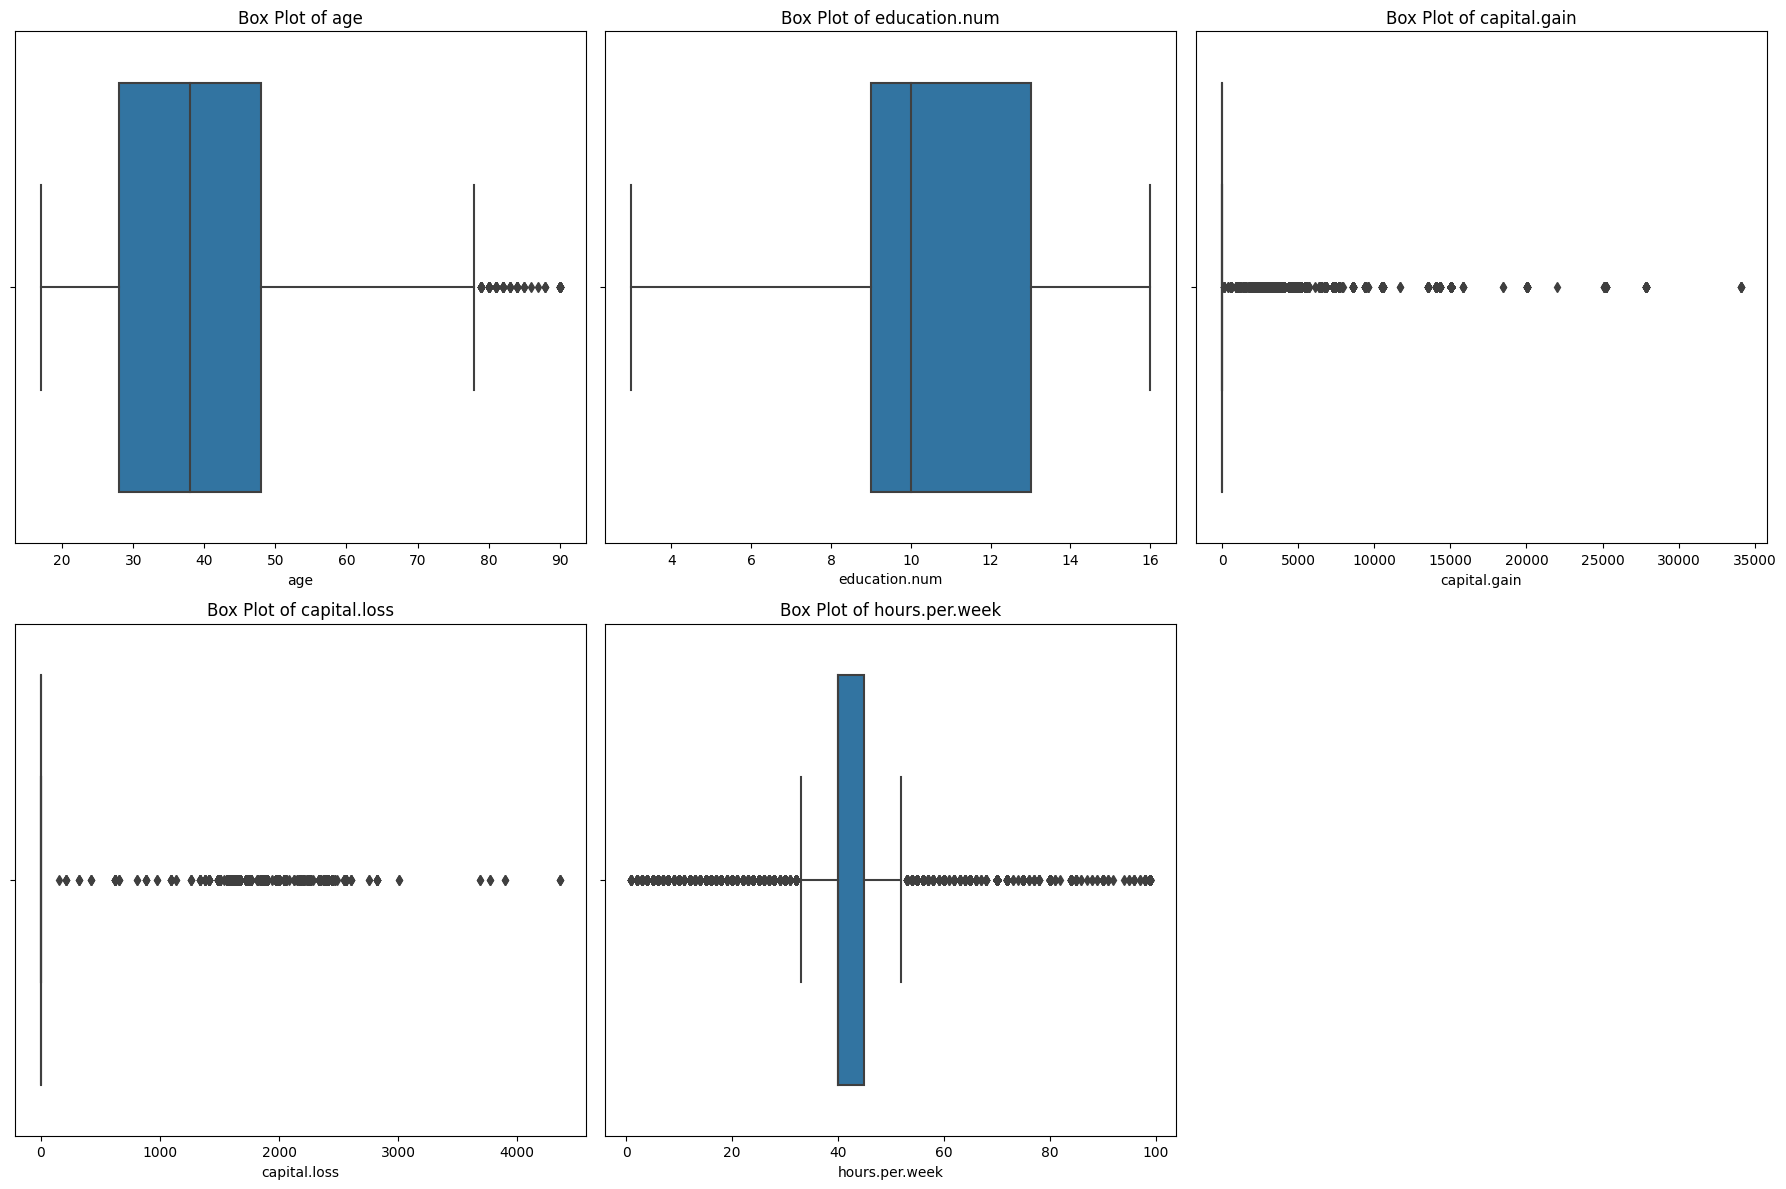

In [262]:
numerical_boxplots(df)

# EDA

In [263]:
df['income'] = np.where(df['income']=='<=50K',0,1)

In [264]:
Y = df['income']
X = df.drop(columns=['income'])

In [265]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0, stratify= Y)

In [266]:
df.isna().sum()[df.isna().sum()>0]

workclass         1611
occupation        1618
native.country     567
dtype: int64

In [267]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [268]:
df.select_dtypes(include=['object']).columns

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')

In [269]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [270]:
# pipe_iter_robust = Pipeline([('iter_imp',IterativeImputer()), ('robust', RobustScaler())])
pipe_iter_bin_one = Pipeline([('iter_imp',IterativeImputer()), ('bin_one', KBinsDiscretizer(strategy='uniform', n_bins= 5, encode='onehot'))])
pipe_iter_bin_or = Pipeline([('iter_imp',IterativeImputer()), ('bin_one', KBinsDiscretizer(strategy='uniform', n_bins= 5, encode='ordinal'))])

pipe_mode_onehot = Pipeline([('mode',SimpleImputer(strategy='most_frequent')), ('onehot',OneHotEncoder())])
pipe_mode_ordinal = Pipeline([('mode',SimpleImputer(strategy='most_frequent')), ('ordinal',OrdinalEncoder())])
pipe_mode_binary = Pipeline([('mode',SimpleImputer(strategy='most_frequent')), ('binary',BinaryEncoder())])


transformer = ColumnTransformer([
    ('pipe_iter_bin_one',pipe_iter_bin_one,['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']),
    # ('pipe_iter_bin_or',pipe_iter_bin_or,['']),
    ('pipe_mode_onehot',pipe_mode_onehot,['race', 'sex']),
    # ('pipe_mode_ordinal',pipe_mode_ordinal,['']),
    ('pipe_mode_binary',pipe_mode_binary,['workclass', 'marital.status', 'occupation', 'relationship', 'native.country'])
    ], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iter_bin_one',
                                 Pipeline(steps=[('iter_imp',
                                                  IterativeImputer()),
                                                 ('bin_one',
                                                  KBinsDiscretizer(strategy='uniform'))]),
                                 ['age', 'education.num', 'capital.gain',
                                  'capital.loss', 'hours.per.week']),
                                ('pipe_mode_onehot',
                                 Pipeline(steps=[('mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['race', 'sex']),
                                ('pipe_mode_binary',
                                 Pipeline(steps=[('mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary', BinaryEncoder())]),
                                 ['workclass', 'marital.status', 'occupation',
                                  'relationship', 'native.country'])])

# Modeling

c:\Users\Vincent\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\Vincent\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\Vincent\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explic

    k  accuracy
9  19  0.829987


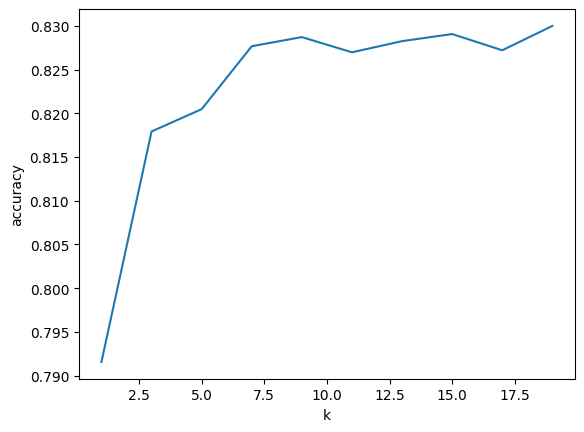

In [292]:
model = KNeighborsClassifier(n_neighbors=5)
pipe_model = Pipeline([('preprocessing', transformer), ('modeling', model)])
pipe_model.fit(X_train, Y_train)
Y_predict = pipe_model.predict(X_test)

accuracy_score(Y_test, Y_predict)


df_acc = pd.DataFrame(columns=['k','accuracy'])
for i in range (1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    pipe_model = Pipeline([('preprocessing', transformer), ('modeling', model)])
    pipe_model.fit(X_train, Y_train)
    Y_predict = pipe_model.predict(X_test)
    df_acc.loc[len(df_acc)] = {'k': i, 'accuracy': accuracy_score(Y_test, Y_predict)}

print(df_acc[df_acc['accuracy']==df_acc['accuracy'].max()])
sns.lineplot(data=df_acc, x='k', y='accuracy')
plt.show()